## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [1]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [2]:
# Your code here . . .
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors ='coerce')
euk
euk[(euk["Class"] == "Mammals") & (euk['Number of genes'] >=2000)].Species.nunique()
#euk_mammals_df = euk[(euk['Class'] == 'Mammals') & (euk['Number of genes'] >= 20000)]

#euk_mammals_df.Class.count()

126

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [3]:
euk[(euk['Kingdom'] == 'Animals')].Class.count()


2181

### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .
euk[(euk['Kingdom'] == 'Animals')].Species.nunique()


1442

### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [ ]:
# Your code here . . .
#euk.Class.str.split().str[0]

euk_Mammals_Macaca= euk[(euk.Class== 'Mammals') & (euk.Species.str.split().str[0] == 'Macaca')]

euk_Mammals_Macaca.Species.unique()
pd.Series(euk_Mammals_Macaca.Species.unique())

,0
0,Macaca mulatta
1,Macaca fascicularis
2,Macaca nemestrina
3,Macaca fuscata


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [ ]:
# Your code here . . .
# Modify the Species names to only contain the first two parts
euk_new = euk[euk["Species"] == euk["Species"].str.split().str[:2].str.join(" ")]
euk_new.head(20)



,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi,Protists,Other Protists,167.67600,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.66900,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.04600,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.92400,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.34900,35.6991,31200,37660,2010,Chromosome
5,Hordeum vulgare,Plants,Land Plants,4006.12000,44.3,-,-,2019,Scaffold
6,Oryza sativa,Plants,Land Plants,374.42300,43.5769,35219,42580,2015,Chromosome
7,Triticum aestivum,Plants,Land Plants,14547.30000,46.0544,-,-,2018,Chromosome
8,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.15710,38.1556,6445,6002,1999,Complete Genome
9,Zea mays,Plants,Land Plants,2135.08000,46.9109,49296,58411,2010,Chromosome


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
animal_classes = euk_new[euk_new["Kingdom"] == "Animals"]

# Count the number of unique species per class
unique_species_counts = animal_classes.groupby("Class")["Species"].nunique()
unique_species = pd.DataFrame(unique_species_counts)
unique_species


,Species
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


<Axes: ylabel='Species'>

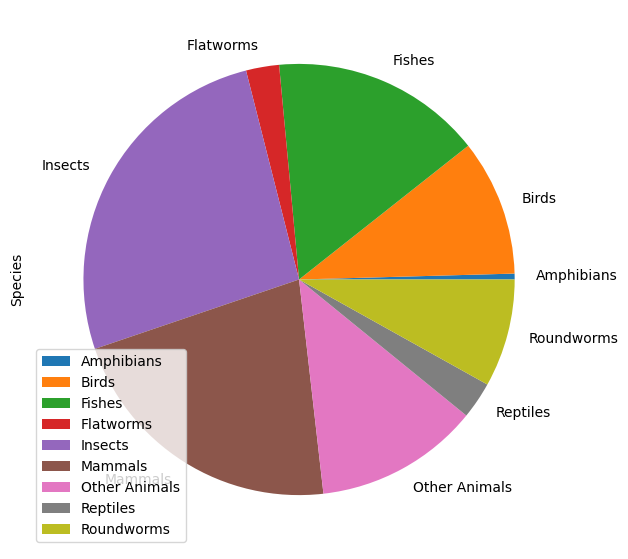

In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
unique_species.plot.pie(y="Species", figsize = (10,7))